# Part I - Prosper Loan Data Exploration
## by (Soad Aljohani)

## Introduction
> The dataset is a collection of all the requested loans in the previous years. It contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate, current loan status, borrower income, credit grade ,and many others. The last updated of the dataset was 2014.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
#load the dataset and have  look on its conten
loan_df = pd.read_csv('prosperLoanData.csv')
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### What is the structure of your dataset?

In [3]:
#checking the structure of the data
loan_df.shape

(113937, 81)

> The dataset has 113,937 records, and 81 columns\variables

### What is/are the main feature(s) of interest in your dataset?

> There are a lot of interesting features in the dataset, and finding the main features depends on who are we going to report to? The borrowers or the lenders. For I'll focuse on the borrowers, so the main features are interval between LoanOriginationDate and ListingCreationDate, BorrowerAPR, MonthlyLoanPayment. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> ListingCreationDate, LoanOriginalAmount, DebtToIncomeRatio, EmploymentStatus, Occupation, ProsperRating (Alpha), Term, IncomeRange, EstimatedLoss.

**Note:** the CreditGrade and ProsperRating (Alpha) are different methods used to measure the risks associated with the loan and credit of borrowers. The CreditGrade is applicable on the giving loans before 2009 only, and ProsperRating (Alpha) is applicable on the giving loans after 2009. So, since the collected data after 2009 is more, I had focused on ProsperRating (Alpha) only.

### Prepare the data for the analysis

In [4]:
#fetch the needed data only
loan_df = loan_df.loc[:, ['LoanOriginationDate','ListingCreationDate','BorrowerAPR','MonthlyLoanPayment', 'Investors', 
                          'EstimatedLoss','ProsperRating (Alpha)', 'LoanOriginalAmount', 'DebtToIncomeRatio',
                          'EmploymentStatus', 'Occupation', 'Term', 'IncomeRange']]

In [5]:
#check the data type 
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   LoanOriginationDate    113937 non-null  object 
 1   ListingCreationDate    113937 non-null  object 
 2   BorrowerAPR            113912 non-null  float64
 3   MonthlyLoanPayment     113937 non-null  float64
 4   Investors              113937 non-null  int64  
 5   EstimatedLoss          84853 non-null   float64
 6   ProsperRating (Alpha)  84853 non-null   object 
 7   LoanOriginalAmount     113937 non-null  int64  
 8   DebtToIncomeRatio      105383 non-null  float64
 9   EmploymentStatus       111682 non-null  object 
 10  Occupation             110349 non-null  object 
 11  Term                   113937 non-null  int64  
 12  IncomeRange            113937 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 11.3+ MB


**There are 3 variables that we have to change which are:**
1. **LoanOriginationDate:** change it to datetime to calculate interval
2. **ListingCreationDate:** change it to datetime to calculate interval
3. **Term:** change it to stringe since it's considered categorical value not used in the calculation

In [6]:
#change the needed data type
loan_df['LoanOriginationDate'] = pd.to_datetime(loan_df['LoanOriginationDate']) 
loan_df['ListingCreationDate'] = pd.to_datetime(loan_df['ListingCreationDate']) 
loan_df['Term'] = loan_df['Term'].astype('str')

In [7]:
#check the change 
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   LoanOriginationDate    113937 non-null  datetime64[ns]
 1   ListingCreationDate    113937 non-null  datetime64[ns]
 2   BorrowerAPR            113912 non-null  float64       
 3   MonthlyLoanPayment     113937 non-null  float64       
 4   Investors              113937 non-null  int64         
 5   EstimatedLoss          84853 non-null   float64       
 6   ProsperRating (Alpha)  84853 non-null   object        
 7   LoanOriginalAmount     113937 non-null  int64         
 8   DebtToIncomeRatio      105383 non-null  float64       
 9   EmploymentStatus       111682 non-null  object        
 10  Occupation             110349 non-null  object        
 11  Term                   113937 non-null  object        
 12  IncomeRange            113937 non-null  obje

In [8]:
#create interval between list cration and obtaining the loan
loan_df['LoanObtainingInterval'] = (loan_df['LoanOriginationDate'] - loan_df['ListingCreationDate']).dt.days

#drop unneeded columns
loan_df.drop(['LoanOriginationDate', 'ListingCreationDate'], axis=1, inplace=True)

In [9]:
loan_df.describe()

,BorrowerAPR,MonthlyLoanPayment,Investors,EstimatedLoss,LoanOriginalAmount,DebtToIncomeRatio,LoanObtainingInterval
count,113912.000000,113937.000000,113937.000000,84853.000000,113937.00000,105383.000000,113937.000000
mean,0.218828,272.475783,80.475228,0.080306,8337.01385,0.275947,11.340969
std,0.080364,192.697812,103.239020,0.046764,6245.80058,0.551759,27.463922
min,0.006530,0.000000,1.000000,0.004900,1000.00000,0.000000,0.000000
25%,0.156290,131.620000,2.000000,0.042400,4000.00000,0.140000,4.000000
50%,0.209760,217.740000,44.000000,0.072400,6500.00000,0.220000,8.000000
75%,0.283810,371.580000,115.000000,0.112000,12000.00000,0.320000,12.000000
max,0.512290,2251.510000,1189.000000,0.366000,35000.00000,10.010000,1094.000000


Based on the results the DebtToIncomeRatio has unusual values like 0 and 10.01. Also, MonthlyLoanPayment has 0 values, so we will check the numbers of records with those values to decide if we had to remove or impude them. Besides, the LoanObtainingInterval has some outliers where the interval max is 1094 days, so we need to check how many outliers we have.

In [10]:
#check the percent of data with 0 value
loan_df[loan_df['MonthlyLoanPayment'] == 0]['DebtToIncomeRatio'].count() / loan_df.shape[0]

0.007644575511028024

In [11]:
#check the percent of data with 0 and above 1 value
loan_df.query('DebtToIncomeRatio == 0 or DebtToIncomeRatio > 1')['DebtToIncomeRatio'].count() / loan_df.shape[0]

0.007179406163055022

Since the number of records is less than 20% is better to remove them. 

In [12]:
#get the index of the recoreds that should be removed
indx_payment = loan_df[loan_df['MonthlyLoanPayment'] == 0].index
indx_DTI = loan_df.query('DebtToIncomeRatio == 0 or DebtToIncomeRatio > 1').index
indx = indx_payment.append(indx_DTI)
#drop the records
loan_df.drop(indx, inplace=True)

In [13]:
#check the percent of days that is above 12
loan_df[loan_df['LoanObtainingInterval']> 12]['LoanObtainingInterval'].count() / loan_df.shape[0]

0.22703247141036267

Since the perecent is more than 20 we have to calculate the IQR to find acceptable range to find and remove the outliers:
>IQR = Q3 - Q1 = 12 - 4 = 8 <br>
>Acceptable range = 12 + (1.5 * 8) = 24

In [14]:
#check the percent of outliers that is above 20
loan_df[loan_df['LoanObtainingInterval'] > 24]['LoanObtainingInterval'].count() / loan_df.shape[0]

0.05719710137176779

In [15]:
#get the index of the recoreds that should be removed
indx = loan_df[loan_df['LoanObtainingInterval'] > 24].index
#drop the records
loan_df.drop(indx, inplace=True)

In [16]:
#check changes
loan_df.describe()

,BorrowerAPR,MonthlyLoanPayment,Investors,EstimatedLoss,LoanOriginalAmount,DebtToIncomeRatio,LoanObtainingInterval
count,105751.000000,105774.000000,105774.000000,78171.000000,105774.000000,97840.000000,105774.000000
mean,0.218732,273.906719,80.324702,0.080391,8344.719279,0.239481,7.907482
std,0.080152,192.120460,103.269087,0.046619,6245.949433,0.135607,5.013650
min,0.006530,0.150000,1.000000,0.004900,1000.000000,0.000440,0.000000
25%,0.156290,133.062500,2.000000,0.042400,4000.000000,0.140000,4.000000
50%,0.209330,218.680000,44.000000,0.072400,6500.000000,0.220000,7.000000
75%,0.283700,371.580000,115.000000,0.112000,12000.000000,0.310000,11.000000
max,0.512290,2251.510000,1189.000000,0.366000,35000.000000,1.000000,24.000000


In [17]:
#check the duplicated records
loan_df.duplicated().sum()

418

In [18]:
#drop duplicates
loan_df.drop_duplicates(inplace=True)

In [19]:
#check the EmploymentStatus values
loan_df['EmploymentStatus'].unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

There're a lot of values that seems to be the same such as other, not available, nan, employed, full-time, part-time. We have to check the number of records in each category and then decide what to do with them.

In [20]:
#check the EmploymentStatus
loan_df['EmploymentStatus'].value_counts()

Employed         61895
Full-time        24674
Self-employed     5577
Not available     5138
Other             3449
Part-time          950
Not employed       745
Retired            726
Name: EmploymentStatus, dtype: int64

The best solution is to put the full-time and part-time as employed, and the rest values as other. 

In [21]:
#creat function to find the alternative status
def EmploymentStatus(status):
    if status == 'Full-time' or status == 'Part-time':
        return 'Employed'
    elif status == 'Not available':
        return 'Other'
    else:
        return status
#apply the function to change the status  
loan_df['EmploymentStatus'] = loan_df['EmploymentStatus'].apply(EmploymentStatus)
#replace the null value with Other
loan_df['EmploymentStatus'] = loan_df['EmploymentStatus'].fillna('Other')

In [22]:
#check the EmploymentStatus
loan_df['EmploymentStatus'].value_counts()

Employed         87519
Other            10789
Self-employed     5577
Not employed       745
Retired            726
Name: EmploymentStatus, dtype: int64

In [23]:
#check unique values of IncomeRange
loan_df['IncomeRange'].value_counts()

$25,000-49,999    29887
$50,000-74,999    28684
$100,000+         16038
$75,000-99,999    15709
Not displayed      7452
$1-24,999          6269
Not employed        719
$0                  598
Name: IncomeRange, dtype: int64

We need to convert the $0 records to not employed since it's refer to the same thing.

In [24]:
#convert the values to Not employed
loan_df['IncomeRange'] = loan_df['IncomeRange'].apply(lambda x: 'Not employed' if x=='$0' else x)
#check changes
loan_df['IncomeRange'].value_counts()

$25,000-49,999    29887
$50,000-74,999    28684
$100,000+         16038
$75,000-99,999    15709
Not displayed      7452
$1-24,999          6269
Not employed       1317
Name: IncomeRange, dtype: int64

In [25]:
#Save the cleaned dataset
loan_df.to_csv('cleaned_loans')

## Questions and Insights 

> Some questions & insights for borrowers:
>   1. How long will it take to obtain a loan?
>   2. What's the annual cost (APR) that borrowers could endure? 
>   3. What's the monthly payment that borrowers could endure?

### How long will it take to obtain a loan?

#### Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


In [96]:
#put the required features in order for future use
EmploymentStatus_order = ['Employed', 'Self-employed', 'Not employed', 
                          'Retired', 'Other']
ProsperRating_order= ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
Term_order = ['12', '36', '60']
IncomeRange_order = ['$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+',
                     'Not displayed', 'Not employed']
#get the defualt color palette for future use
def_color = sns.color_palette()[0]

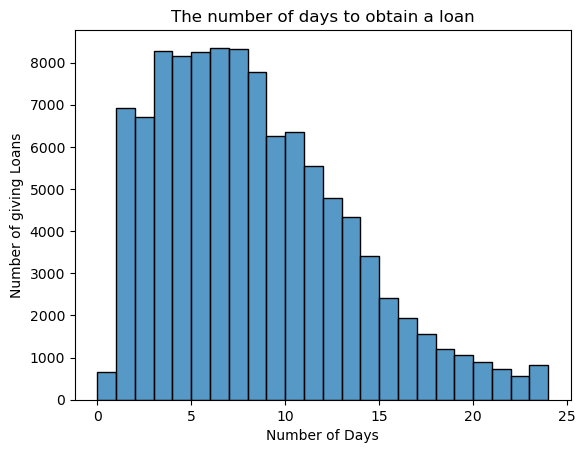

In [97]:
#check the disterbution of LoanObtainingInterval
plt.figure(1)
sns.histplot(loan_df['LoanObtainingInterval'], bins = 24)
plt.title('The number of days to obtain a loan')
plt.xlabel('Number of Days')
plt.ylabel('Number of giving Loans');

Based on the chart, most of the requested loans took between 2 to 15 days to receive it. Besides, the bank granted from 6000 to over 8000 loan requests in each day between 2-10 days, and the number of loans decreased gradually after the 10 days. 

#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of the days to obtain a loan is righ skwed. Since we have removed the outliers earlier, there aren't unusual points and I didn't need to perform the transformations.

#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes I did, first I had to convert the data types of LoanOriginationDate and ListingCreationDate from string to datetime, so I can perform some calculation on it. Then, I had to calculate the interval between them to get the number of days that have been taken to obtain a loan. After that I had to remove the outliers from the data to get a good disterbution. 

#### Bivariate Exploration

**Does the requested loan amount affect the duration to obtain the loan?**

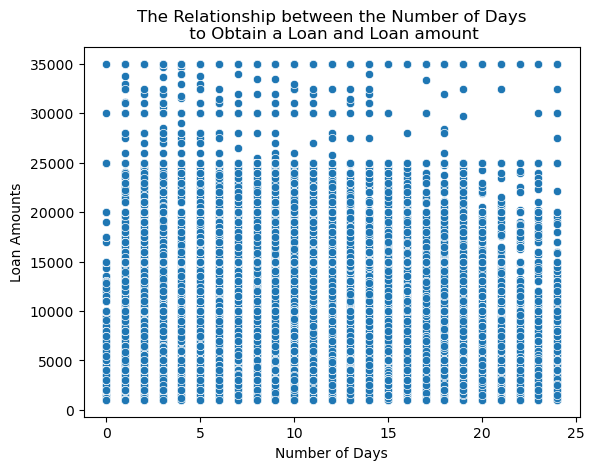

In [98]:
#check the relationship between the number of days to obtain a loan and loan amount
plt.figure(2)
sns.scatterplot(data=loan_df, x= 'LoanObtainingInterval', y = 'LoanOriginalAmount')
plt.title('The Relationship between the Number of Days\n to Obtain a Loan and Loan amount')
plt.xlabel('Number of Days')
plt.ylabel('Loan Amounts');

> The chart confirmed that the loan amount does not effect the duration to obtain it.

**Does being retired or unemployed affect the duration to obtain the loans?**

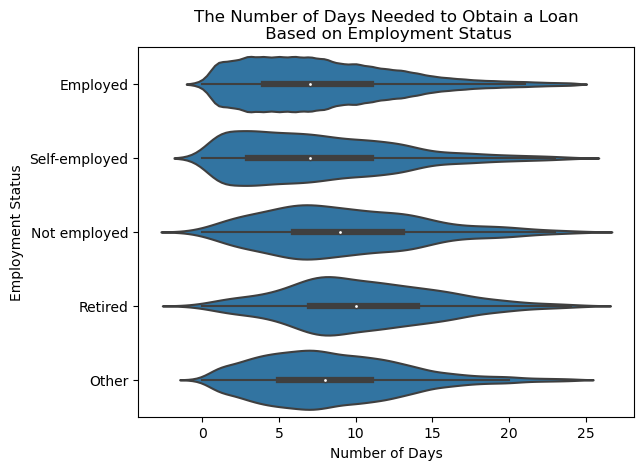

In [99]:
#check how many days will take to obtain a loan based on employment status
plt.figure(3)
sns.violinplot(data=loan_df, x= 'LoanObtainingInterval', y = 'EmploymentStatus', color=def_color, 
               order=EmploymentStatus_order)
plt.title('The Number of Days Needed to Obtain a Loan\n Based on Employment Status')
plt.xlabel('Number of Days')
plt.ylabel('Employment Status');

The chart illustrated that most of the employed and self-employed received their loans during 10 days from the day of their request. On the other hand, most of the loans requested by the retired and not employed have been processd after 5 days from the day of their request, so they received their loans between 5 to 15 days.

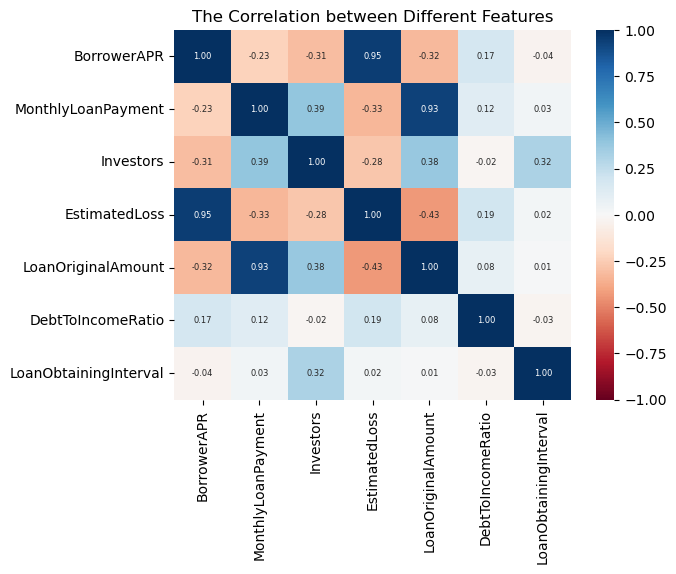

In [100]:
#check the correlation between different features
plt.figure(4)
sns.heatmap(loan_df.corr(), cmap='RdBu', annot=True, annot_kws={'size': 6}, fmt='.2f', vmax=1, vmin=-1)
plt.title('The Correlation between Different Features');

Based on the heatmap, there are few correlation between different features most of it is weak such as:
1. LoanObtainingInterval and Investors - positive correlation
2. LoanOriginalAmount and BorrowerAPR - negative correlation
3. LoanOriginalAmount and Investors - positive correlation
4. LoanOriginalAmount and EstimatedLoss - negative correlation
5. EstimatedLoss and MonthlyLoanPayment - negative correlation
6. EstimatedLoss and Investors - negative correlation
7. Investors and BorrowerAPR - negative correlation
8. Investors and MonthlyLoanPayment - positive correlation
9. MonthlyLoanPayment and BorrowerAPR - negative correlation

There are only 2 strong relationship which are:
1. EstimatedLoss and BorrowerAPR - positive correlation
2. LoanObtainingInterval and Investors - positive correlation

#### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Our invistigation domenstrated that there's no relationship between the amount of the loan and the days needed to receive the loan. Also, there's a relationship between the employment status and the days needed to receive the loan where most of the employed and self-employed received their loans earlier than those who are not employed or retired. Moreover, most of the other features are not correlated with the number of days to obtain the loans. There's only one positive correlation which is with the number of investors and it considered as a weak relationship.

#### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> the only interesting relationship is between the estimated loss and loan amount, where increasing the loan amount will reduce estimated loss which is a little bit strange!

### Multivariate Exploration

**Does the number of investors affect the period to obtain a loan in different terms?**

<Figure size 640x480 with 0 Axes>

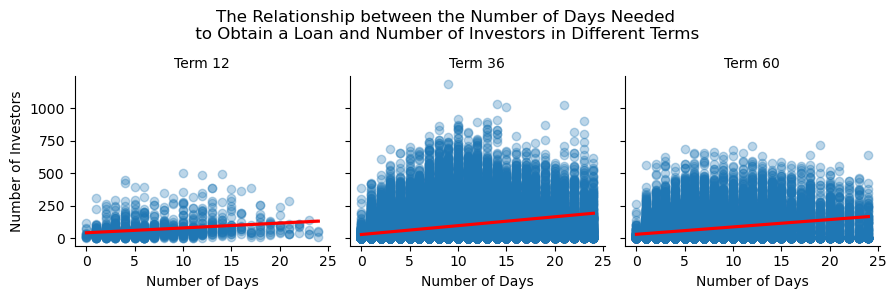

In [30]:
#check the relationship number of investors and the needed days to obtain loan in different terms
plt.figure(5)
g = sns.FacetGrid(data= loan_df,col='Term', col_order=Term_order)
g.map(sns.regplot, 'LoanObtainingInterval', 'Investors', line_kws={'color':'r'}, scatter_kws={'alpha':0.3} )
g.fig.suptitle('The Relationship between the Number of Days Needed\n to Obtain a Loan and Number of Investors in Different Terms', y=0.98)
g.fig.subplots_adjust(top=0.76)
g.set_titles('Term {col_name}')
g.set_xlabels('Number of Days')
g.set_ylabels('Number of Investors');

Based on the charts, there's a positive relationship between the number of investors and the days needed to obtain the loan, but the relationship is weak specially in term 12. This relationship is so reasonable since taking a medium or long term loan, required more time to collect it specially if the loan amount is large where you either have to get a lot of investors or few angel investors.

**Does the prosper rating affect the period to obtain a loan in different terms?**

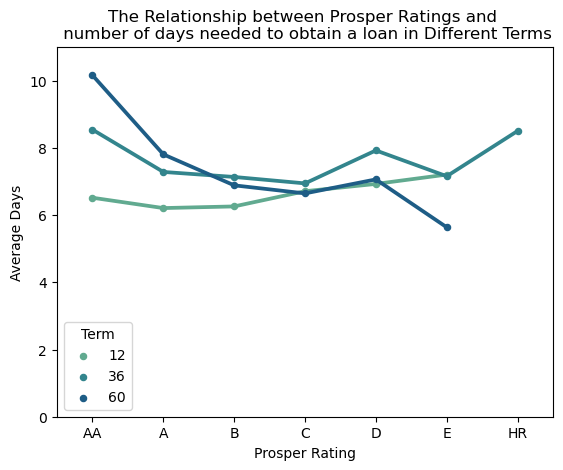

In [43]:
plt.figure(6)
sns.pointplot(data=loan_df, x='ProsperRating (Alpha)', y='LoanObtainingInterval', hue='Term', markers='.', join=True,
              ci=None, palette='crest', order=ProsperRating_order, hue_order=Term_order)
plt.title('The Relationship between Prosper Ratings and \n number of days needed to obtain a loan in Different Terms')
plt.xlabel('Prosper Rating')
plt.ylim(0,11)
plt.ylabel('Average Days');

In general, the required days to obtain a short term loan is less than the other terms since it needs 6-7 days to obtain it. On the other hand, the mid term loan is taking a little bit longer between 7-9 days. Lastly, the long term loan highly depends on prosper rating since the days range is between 5-10.

Besides, the borrowers with low risk rating received their short term loan a little nit earlier than those with high risk rate. For the mid term loan it doesn't have a clear relationship between the days needed and prosper ratings since both the low and high ratings have a similar average days.In contrast, the long term loan will take longer days between 8-10 days to receive it for the borrowers with AA and A rating comparing with those with high risk rate which could take 7 days and less.

#### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> There's a weak positive relationship between the number of investors and days needed to receive the loan, but the relationship is a little bit stronger in the mid and long terms loan(36 & 60).

> There's a relationship between the average days needed to obtain a loan and the loan terms as well as prosper rating. For the average days and short term loan there's a positive relationship where having a low risk rates could reduce the average days needed to obtain the loan and having a high risk rate could increase the average days needed. For the long term there's a negative relationship where having a low risk rates will increase the average days to obtain the loan and having a high risk rate will decrease the average days needed. For the mid-terms there's no relationship between the average days and prosper ratings.

#### Were there any interesting or surprising interactions between features?

> The most interesting relationship was between prosper rating and average days of the long term loan where it takes longer comparing to those with high risk rating, but it could be depends on other factors like the loan amount.

### What's the annual cost (APR) that borrowers could endure?

#### Univariate Exploration


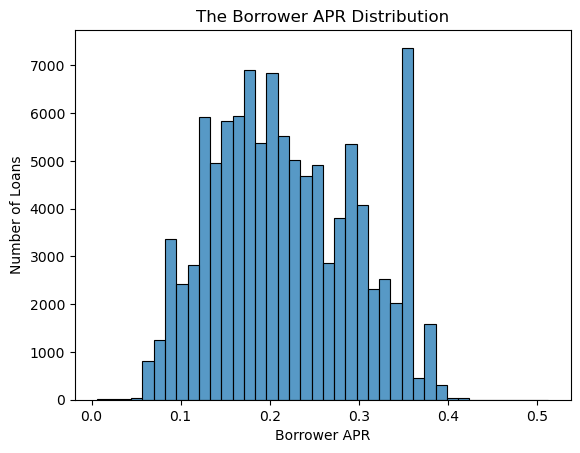

In [31]:
#check the distribution of BorrowerAPR
plt.figure(7)
sns.histplot(loan_df['BorrowerAPR'],bins = 40)
plt.title('The Borrower APR Distribution')
plt.xlabel('Borrower APR')
plt.ylabel('Number of Loans');

Based on the disterbution of BorrowerAPR, most of the borrowers pay between 0.13 and 0.26 as an annual cost of their loans. Also, there are some borrowers who pay more since there are multipule peaks at 0.29-0.30 and 0.35-0.36

#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of BorrowerAPR is multimodel since there're multiple peaks in the data. Although there are multiple peaks in the data, we still don't need to perform any transformations since the data flow is acceptable and can interpret it. 

#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No, I didn't. The data range, type, and visualization are good, so no need to clean it.

#### Bivariate Exploration

**Does the loan amount increase the annual cost (APR) that borrowers could endure?**

In [32]:
#taking some sample from the dataframe to improve the visualization
loans_sample = loan_df.sample(10000, replace=False)

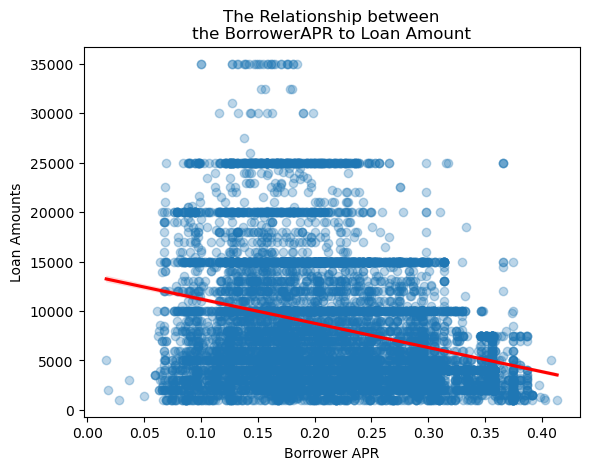

In [33]:
#check the relationship between BorrowerAPR and LoanOriginalAmount
plt.figure(8)
sns.regplot(data=loans_sample, x='BorrowerAPR', y='LoanOriginalAmount', line_kws={'color':'r'}, scatter_kws={'alpha':0.3})
plt.title('The Relationship between\nthe BorrowerAPR to Loan Amount')
plt.xlabel('Borrower APR')
plt.ylabel('Loan Amounts');

The chart illustrate that there's a weak negative relationship between annual cost (APR) and loan amount, so increasing the loan amount is not necessary lead to increase the annual cost (APR).

**Is having a higher annual cost (APR) could increase the estmated loss?**

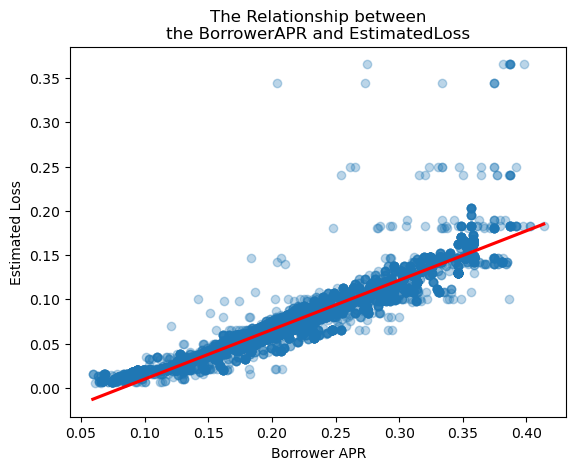

In [34]:
#check the relationship between BorrowerAPR and EstimatedLoss 
plt.figure(8)
sns.regplot(data=loans_sample, x='BorrowerAPR', y='EstimatedLoss', line_kws={'color':'r'}, scatter_kws={'alpha':0.3})
plt.title('The Relationship between\nthe BorrowerAPR and EstimatedLoss')
plt.xlabel('Borrower APR')
plt.ylabel('Estimated Loss');

There's a strong positivee relationship between borrower APR and estimated loss, so having a higher APR will lead to increase the estimated loss.

**What are the occupations that paid the highest APR and the lowest APR?**

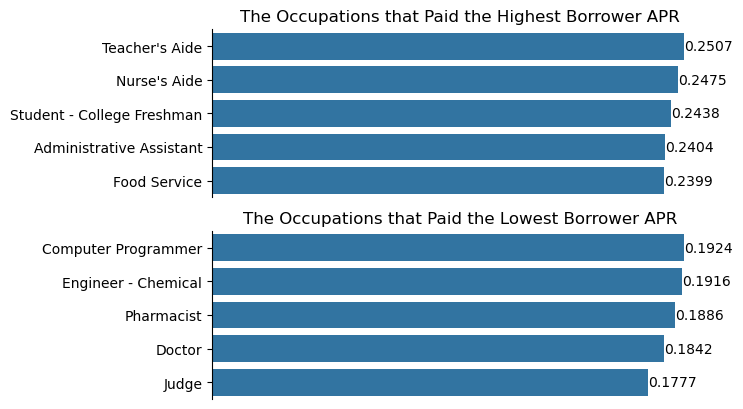

In [35]:
# calculate the mean of APR for each occupation
mean_apr_byjobs = loan_df.groupby('Occupation', as_index=False)['BorrowerAPR'].mean().sort_values(by='BorrowerAPR')

#get the least and top paid APR  
least_paid_apr = mean_apr_byjobs[:5].sort_values(by='BorrowerAPR', ascending=False)
top_paid_apr = mean_apr_byjobs[-5:].sort_values(by='BorrowerAPR', ascending=False)

#create the figure 
plt.figure(9)
plt.subplot(2,1,1)
bar_val = sns.barplot(data=top_paid_apr, x='BorrowerAPR', y='Occupation', color= def_color)
plt.bar_label(bar_val.containers[0], fmt='%.4f') # add the values on bars
sns.despine(bottom=True) # remove the border
plt.xticks([]) # remove x-ticks
plt.xlabel('') # remove x-label
plt.ylabel('') # remove y-label
plt.title('The Occupations that Paid the Highest Borrower APR')
plt.subplot(2,1,2)
bar_val2 = sns.barplot(data=least_paid_apr, x='BorrowerAPR', y='Occupation', color= def_color) 
plt.bar_label(bar_val2.containers[0], fmt='%.4f') # add the vakues on bars
sns.despine(bottom=True) # remove the border
plt.xticks([]) # remove x-ticks
plt.xlabel('') # remove x-label
plt.ylabel('') # remove y-label
plt.title('The Occupations that Paid the Lowest Borrower APR');

Based on the results, most of the occupations that pay a high APR are those with the lowest salary where the top three are teacher's aid, nurse's aid, and college student. In contrast, the well paid occupations appeared that they are paying the lowest APR which are judge, doctor, and pharmacist.

**What are the Porpotions of Prosper Ratings for each Occupation?**

<Figure size 640x480 with 0 Axes>

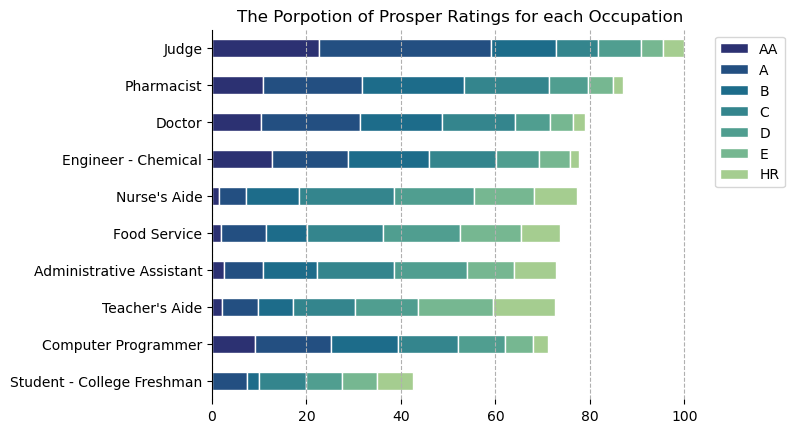

In [37]:
#create 2nd dataframe includes only the occupations of our interest
occupations = ['Judge', 'Doctor','Pharmacist', 'Engineer - Chemical', 'Computer Programmer', 'Teacher\'s Aide', 'Nurse\'s Aide',
           'Student - College Freshman', 'Administrative Assistant', 'Food Service']
loans_df2 = loan_df.query('Occupation in @occupations')

#count the ProsperRating (Alpha) in each occupation
rating_count = loans_df2[['Occupation','ProsperRating (Alpha)']].value_counts()
occupation_count = loans_df2['Occupation'].value_counts()

#calculate the rating proportion in each occupation
Judge_ratingProp = rating_count['Judge']/occupation_count['Judge'] * 100
doctor_ratingProp = rating_count['Doctor']/occupation_count['Doctor'] * 100
Pharmacist_ratingProp = rating_count['Pharmacist']/occupation_count['Pharmacist'] * 100
Engineer_ratingProp = rating_count['Engineer - Chemical']/occupation_count['Engineer - Chemical'] * 100
programmer_ratingProp = rating_count['Computer Programmer']/occupation_count['Computer Programmer'] * 100

teacher_ratingProp = rating_count['Teacher\'s Aide']/occupation_count['Teacher\'s Aide'] * 100
nurse_ratingProp = rating_count['Nurse\'s Aide']/occupation_count['Nurse\'s Aide'] * 100
student_ratingProp = rating_count['Student - College Freshman']/occupation_count['Student - College Freshman'] * 100
adm_ratingProp = rating_count['Administrative Assistant']/occupation_count['Administrative Assistant'] * 100
food_ratingProp = rating_count['Food Service']/occupation_count['Food Service'] * 100

#prepering the data for visiualization
AA_prop = [Judge_ratingProp['AA'],doctor_ratingProp['AA'],Pharmacist_ratingProp['AA'],Engineer_ratingProp['AA']
           ,programmer_ratingProp['AA'],teacher_ratingProp['AA'],nurse_ratingProp['AA'],0.0
           ,adm_ratingProp['AA'],food_ratingProp['AA']]
A_prop = [Judge_ratingProp['A'],doctor_ratingProp['A'],Pharmacist_ratingProp['A'],Engineer_ratingProp['A']
           ,programmer_ratingProp['A'],teacher_ratingProp['A'],nurse_ratingProp['A'],student_ratingProp['A']
           ,adm_ratingProp['A'],food_ratingProp['A']]
B_prop = [Judge_ratingProp['B'],doctor_ratingProp['B'],Pharmacist_ratingProp['B'],Engineer_ratingProp['B']
           ,programmer_ratingProp['B'],teacher_ratingProp['B'],nurse_ratingProp['B'],student_ratingProp['B']
           ,adm_ratingProp['B'],food_ratingProp['B']]
C_prop = [Judge_ratingProp['C'],doctor_ratingProp['C'],Pharmacist_ratingProp['C'],Engineer_ratingProp['C']
           ,programmer_ratingProp['C'],teacher_ratingProp['C'],nurse_ratingProp['C'],student_ratingProp['C']
           ,adm_ratingProp['C'],food_ratingProp['C']]
D_prop = [Judge_ratingProp['D'],doctor_ratingProp['D'],Pharmacist_ratingProp['D'],Engineer_ratingProp['D']
           ,programmer_ratingProp['D'],teacher_ratingProp['D'],nurse_ratingProp['D'],student_ratingProp['D']
           ,adm_ratingProp['D'],food_ratingProp['D']]
E_prop = [Judge_ratingProp['E'],doctor_ratingProp['E'],Pharmacist_ratingProp['E'],Engineer_ratingProp['E']
           ,programmer_ratingProp['E'],teacher_ratingProp['E'],nurse_ratingProp['E'],student_ratingProp['E']
           ,adm_ratingProp['E'],food_ratingProp['E']]
HR_prop = [Judge_ratingProp['HR'],doctor_ratingProp['HR'],Pharmacist_ratingProp['HR'],Engineer_ratingProp['HR']
           ,programmer_ratingProp['HR'],teacher_ratingProp['HR'],nurse_ratingProp['HR'],student_ratingProp['HR']
           ,adm_ratingProp['HR'],food_ratingProp['HR']]

#for the location of the bars
yticks = np.arange(len(AA_prop))

#convert the lists to serieses
Occupation = pd.Series(occupations)
AA = pd.Series(AA_prop)
A = pd.Series(A_prop)
B = pd.Series(B_prop)
C = pd.Series(C_prop)
D = pd.Series(D_prop)
E = pd.Series(E_prop)
HR = pd.Series(HR_prop)

#create the columns from the serieses
Occupation_col = Occupation.to_frame('Occupation')
AA_col = AA.to_frame('AA')
A_col = A.to_frame('A')
B_col = B.to_frame('B')
C_col = C.to_frame('C')
D_col = D.to_frame('D')
E_col = E.to_frame('E')
HR_col = HR.to_frame('HR')

#create rating dataframe
rating_df = pd.concat([Occupation_col, AA_col, A_col, B_col, C_col, D_col, E_col, HR_col], axis=1)
#sorting the data
rating_df['total'] = rating_df[['AA','A','B','C','D','E', 'HR']].sum(axis=1)
rating_df = rating_df.sort_values('total')
#create the visiualization
plt.figure(10)
rating_df[['AA','A','B','C','D','E', 'HR']].plot(kind='barh', stacked=True, colormap="crest_r", edgecolor='w')
plt.yticks(yticks, rating_df['Occupation'])
plt.title('The Porpotion of Prosper Ratings for each Occupation')
plt.grid(axis='x', linestyle='dashed')
plt.legend(loc ='upper left', bbox_to_anchor=(1,1), ncol=1)

sns.despine(bottom=True);

The chart demonstrated that most of the occupations that pay the lowest APR have prosper ratings with low risks which are AA, A, and B. On other hand, the occupations that pay the highest APR have prosper ratings with high risks which are HR, E, D.

#### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Our invistigation domenstrated that there's a weak negative relationship between the amount of the loan and the annual cost (APR), which mean taking a big loan amount could decrease APR. Also, there's a strong positive relationship between having a high APR and increasing the estimated loss which could reduce some investors tendency to invest and provide a loan, but even though based on the previous heatmap having a high APR also increase the leander yield since there's a strong positive relationship between them. Finally, the occupations that pay the least APR are  judge, doctor, and pharmacist. in contrast, the occupations that pay the highest APR are teacher's aid, nurse's aid, college student.

#### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> One of the interesting relationship is between occupations and prosper ratings where most of the well paid jobs have a lower risk ratings (AA, A, B) which is expected to be. In contrast, the lower paid jobs and fresh college students have a higher risk ratings (HR, E, D).

### Multivariate Exploration

**How do Prosper Ratings and choosing different terms affect the charged Borrower APR?**

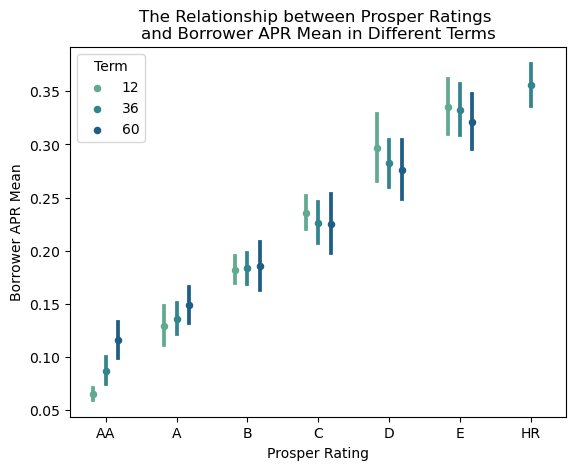

In [38]:
#check the relationship between BorrowerAPR and ProsperRating in different term
plt.figure(11)
sns.pointplot(data=loan_df, x='ProsperRating (Alpha)', y='BorrowerAPR', hue='Term', markers='.', join=False,
              dodge=0.35, ci='sd', palette='crest', order=ProsperRating_order, hue_order=Term_order)
plt.title('The Relationship between Prosper Ratings \nand Borrower APR Mean in Different Terms')
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower APR Mean');

The chart confirmed that the borrower APR is highly affected by prosper ratings where having a high risk ratings(HR,E,D) will increase the chareged APR. Otherwise, having a low risk rating (AA, A, B) will decrease the chareged APR. Moreover, choosing different terms affect the chareged APR where AA, A, B, and C are being charged less if they choose shorter loans terms. On the other hand, choosing longer loans terms for C, D, E, and HR will decrease the charged APR.

How do income range and choosing different terms affect the charged Borrower APR?

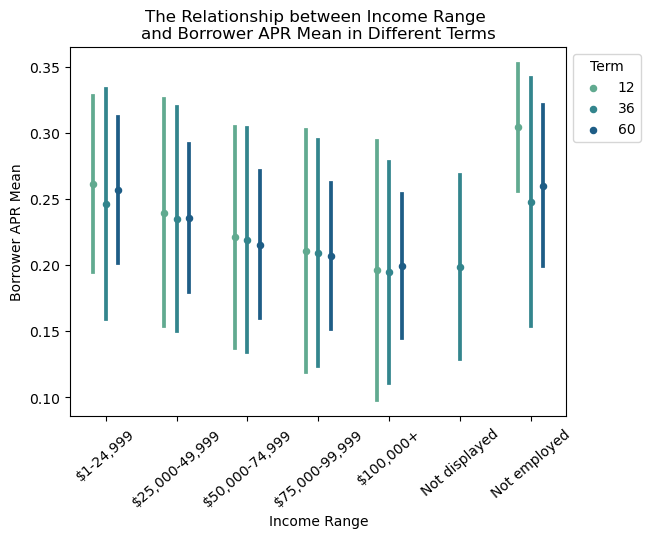

In [39]:
plt.figure(12)
sns.pointplot(data=loan_df, x='IncomeRange', y='BorrowerAPR', hue='Term', markers='.', join=False,
              dodge=0.35, ci='sd', palette='crest', order=IncomeRange_order,  hue_order=Term_order)
plt.title('The Relationship between Income Range \nand Borrower APR Mean in Different Terms')
plt.xlabel('Income Range')
plt.ylabel('Borrower APR Mean')
plt.xticks(rotation=40)
plt.legend(loc ='upper left', bbox_to_anchor=(1,1), ncol=1, title='Term');

In general, having a lower salary or being unemployed will increase the charged APR for borrowers.Besides, taking a short term loan(term 12) will cost more APR than taking mid or long term loan (term 36, 60). Even though, there's some exception in the data since those with $1-24k, $100k+, and unemployed could pay more APR if they take a long term loan comparing with those who take a mid term loan.

#### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> There's a strong positive relationship between the prosper ratings and borrowers APR where having a lower risk rating(AA,A,B) charged less APR, and the opposite if you have a higher risk rating(HR, E, D) which charged more APR. Also, the term could affect the APR where those with low ratings paid more APR when they took -mid-long term loans, but those with lower APR where paying more with taking a short term loan.

>Also, there's a strong negative relationship between income range and borrowers APR where having more income will lead to charge less APR. Besides, choosing long term loan will decrease APR comparing with those with the short term loan.

#### Were there any interesting or surprising interactions between features?

> One of the surprising interactions was the opposite charging APR between those with low risk rating who pay more when they chose long term loan, and those with high risk rating who pay more when they chose short term loan.

### What's the monthly payment that borrowers could endure?

#### Univariate Exploration


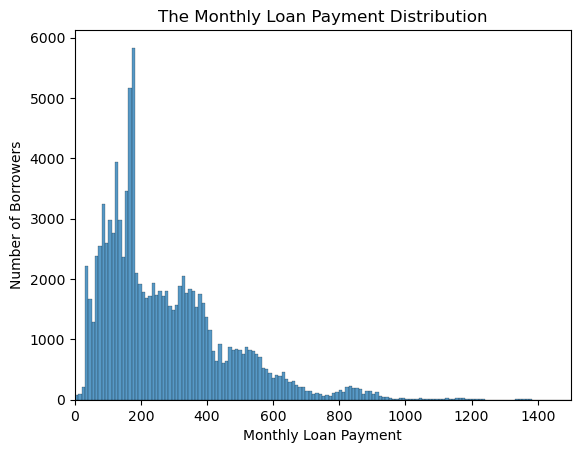

In [40]:
#check the distribution of MonthlyLoanPayment
xticks = np.arange(loan_df['MonthlyLoanPayment'].all())
plt.figure(13)
sns.histplot(loan_df['MonthlyLoanPayment'])
plt.xlim(0,1500)
plt.title('The Monthly Loan Payment Distribution')
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Number of Borrowers');

Based on the disterbution of MonthlyLoanPayment, most of the borrowers pay between 0.15 and 200 monthly where there's multi-peaks fall in this range. Also, there are some borrowers who pay much more, but the numbers of borrowers is decreased to less than 2000 borrowers between $200 - $400 monthly payments, furthermore, it reduced even more to less than 1000 borrowers for $400+ monthly payments.

#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of BorrowerAPR is a right skwed distribution and also considered a multimodel since there're multiple peaks in the data. Although there are multiple peaks in the data, we still don't need to perform any transformations since the data flow is acceptable and can interpret it. 

#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No, I didn't. The data range, type, and visualization are good, so no need to clean it.

#### Bivariate Exploration

**Does having a high annual cost (APR) could increase the monthtly loan payments that borrowers could endure?**

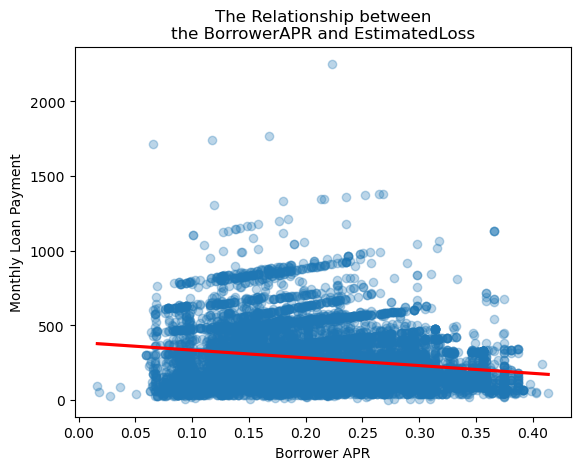

In [41]:
#LoanOriginalAmount and BorrowerAPR 
#check the relationship between MonthlyLoanPayment and BorrowerAPR 
plt.figure(13)
sns.regplot(data=loans_sample, x='BorrowerAPR', y='MonthlyLoanPayment', line_kws={'color':'r'}, scatter_kws={'alpha':0.3})
plt.title('The Relationship between\nthe BorrowerAPR and EstimatedLoss')
plt.xlabel('Borrower APR')
plt.ylabel('Monthly Loan Payment ($)');

#### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The chart illustrates that there's a weak negative relationship between the annual cost (APR) and monthly loan payment. So, having a higher annual cost (APR) may reduce monthly loan payment.


### Multivariate Exploration

**How much could borrowers pay monthly based on having different prosper rating and choosing different term?**

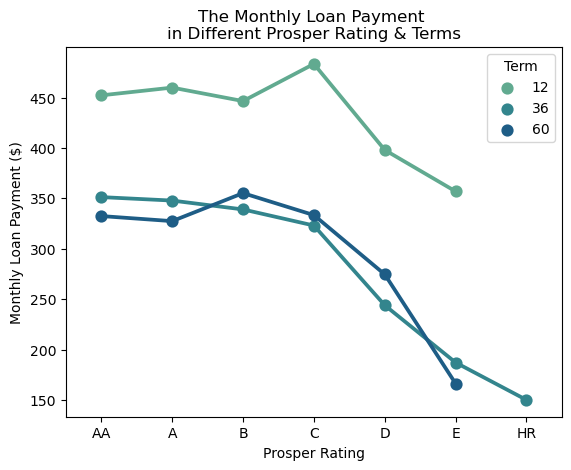

In [42]:
# check the relationship between the prosper rating and MonthlyLoanPayment based on the terms
plt.figure(14)
sns.pointplot(data= loan_df, x='ProsperRating (Alpha)', y='MonthlyLoanPayment', hue='Term'
              , order=ProsperRating_order, hue_order=Term_order, ci=None, palette='crest')
plt.title('The Monthly Loan Payment \nin Different Prosper Rating & Terms')
plt.xlabel('Prosper Rating')
plt.ylabel('Mean Monthly Loan Payment ($)');

In general, choosing a short term loan increases the borrowers' monthly payment and this is expectable since there's a short time to pay the loans. In contrast, choosing a mid or long term will put the borrowers in much ease since they have a longer time to pay the loan so the payment range is so close to each other which is between 350-300 for those with AA to C prosper ratings, and the payment then decreased tremendously for every prosper ratings where D pays between 250-200, E pays between 200-150, and HR pays 150.

**How much loan could be obtained within each prosper rating and terms?**

<Figure size 640x480 with 0 Axes>

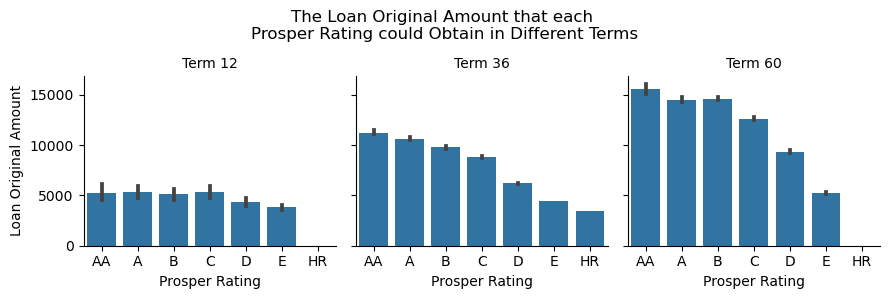

In [45]:
#check the difference between the loan amount for each prosper rating in each term
plt.figure(15)
g = sns.FacetGrid(data= loan_df,col='Term', col_order=Term_order)
g.map(sns.barplot, 'ProsperRating (Alpha)', 'LoanOriginalAmount', order=ProsperRating_order)
g.fig.suptitle('The Loan Original Amount that each \nProsper Rating could Obtain in Different Terms', y=0.98)
g.fig.subplots_adjust(top=0.76)
g.set_titles('Term {col_name}')
g.set_xlabels('Prosper Rating')
g.set_ylabels('Mean Loan Amount ($)');

Based on the chart, most of the requested loan was 5k and below for those who took a short term loan. Besides, the requested loan was 11k and bellow for those who granted a mid-term loan. Finally, most of those who granted long term loan, request 16k loan and below.

#### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> There's a strong negative relationship between the prosper ratings and borrowers' monthly loan payment where most of the lower risk rating(AA,A,B) pay more monthly loan payment, in contrast of the higher risk rating(HR, E, D) where they pay less monthly loan. However, this relationship is explainable where the second chart confirmed that the borrowers with low risk rating request higher loan amount than those with the high risk rating. Moreover, taking a short term loan will lead to increase monthly loan payment comparing to those who request a mid-long term loan.

#### Were there any interesting or surprising interactions between features?

> No, most of the relationships are reasonable, specially after looking deeply into the data such as the negative relationship between the annual cost (APR) and monthly loan payment since most of the low risk ratings have a low APR but at the same time they paid a high monthly loan which is eventually related to the high loan amount they usually request it.

## Conclusions
At the end of our investigation we have addressed a lot of facts and answers that could serve the borrowers to know more about the loans. The analysis answered the following:
1. How long will it take to obtain a loan?
> In general, the loans could be obtained within 2 weeks from the requested day, and it could take 24 days maximum. Moreover, the emplyment status could affect the duration where being employed could faster the process and helped to obtain the loan within 10 days, but being unemployed or retired could delayed the process and the loan could be obtained after 5 days from the request date till 15 days. Also, taking long term loan for those with low risk rating could take 8-10 days in contrast of those with high risk rating which could take 5-7 days. Besides, taking a short term loan for those with low risk rate would take less time approximately 6 days, but the difference is not significent with those with low risk rate since their short term loan could take arounf 7 days.
2. What's the annual cost (APR) that borrowers could endure?
> Most of the borrowers pay between 0.13 and 0.26 as an annual cost of their loans. Also, there are some borrowers who pay more between 0.29-0.30 and 0.35-0.36.In addition, The cost could be affected by occupation and prosper ratings (risk rate) where those with a well paid occupations have low risk ratings what's eventually lower the annual cost (APR) and vise versa. 
3. What's the monthly payment that borrowers could endure?
> The monthly loan payment is highly depends on the choosing terms, loan amount, and prosper ratings (risk rate). In general, choosing a short term loan cost a higher monthly payment where most of borrowers pay more than 400, in contrast of the mid-long term where the payment range is so close to each other which could be between 300-350 for those with low risk rating(AA, A, B) and less than 300 for those with high risk rating(HR, E, D). Also, this range is affected by loan amount where borrowers with low risk rating requst a high loan amount and the opposite with high risk rating(HR, E, D) who request low loan amount.